## Importação das bibliotecas

In [18]:
#importar bibliotecas
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

## Importando, observando e tratando o dataset

In [2]:
#importar dataset
dataset=keras.datasets.fashion_mnist

In [3]:
#carregar dataset
((imagens_treino,identificacoes_treino),(imagens_teste,identificacoess_teste))=dataset.load_data()

In [4]:
#verificando formato, um array 60000 com imagens 28x28
imagens_treino.shape
#imagens_teste.shape
#identificacoess_teste.shape
#identificacoes_treino.shape

(60000, 28, 28)

Text(0.5, 1.0, '9')

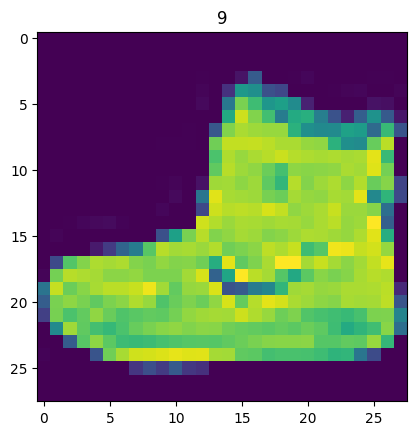

In [5]:
#mostrando uma imagem de treino usando o matplotlib
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [6]:
#retirar o numero minimo do array e o numero maximo sendo 0 e 9
identificacoes_treino.min()
identificacoes_treino.max()

9

In [7]:
#dando nome para as classificações que estão em numero
nome_classificacoes=['Camiseta','Calça','Pullover','Vestido','Casaco','Sandália','Camisa','Tênis','Bolsa','Bota']

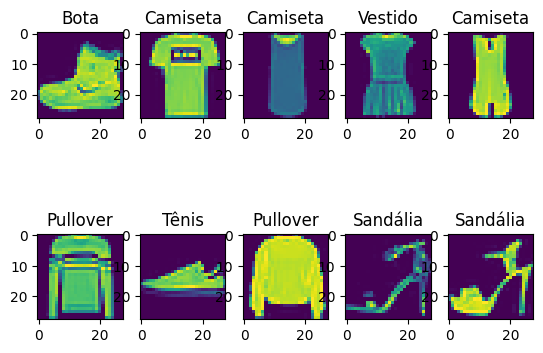

In [8]:
#mostrando dez imagens em um subgrafico e seus titulos.
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificacoes[identificacoes_treino[imagem]])

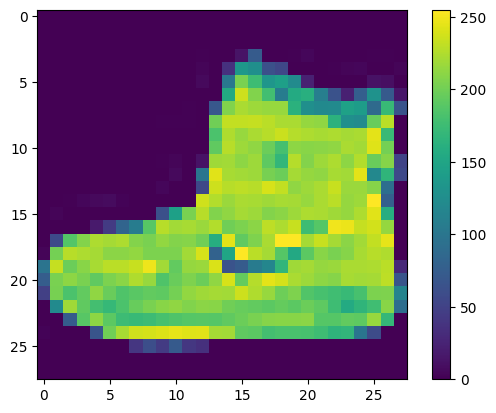

In [9]:
#ver a gradação de cor
plt.imshow(imagens_treino[0])
plt.colorbar()

In [10]:
#normalização
imagens_treino=imagens_treino/float(255)

## Treinando e salvando o modelo

In [28]:
# Treinamento do modelo
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilação do modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=9, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7497 - loss: 0.7006 - val_accuracy: 0.8571 - val_loss: 0.4007
Epoch 2/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8474 - loss: 0.4139 - val_accuracy: 0.8568 - val_loss: 0.3869
Epoch 3/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8611 - loss: 0.3776 - val_accuracy: 0.8739 - val_loss: 0.3418
Epoch 4/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8723 - loss: 0.3444 - val_accuracy: 0.8735 - val_loss: 0.3568
Epoch 5/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8763 - loss: 0.3369 - val_accuracy: 0.8709 - val_loss: 0.3524
Epoch 6/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8826 - loss: 0.3157 - val_accuracy: 0.8789 - val_loss: 0.3366
Epoch 7/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8839 - loss: 0.3104 - val_accuracy: 0.8867 - val_loss: 0.3156
Epoch 8/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8940 - loss: 0.2887 - v

In [33]:
# Salvando o modelo
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

## Gráficos do treinamento

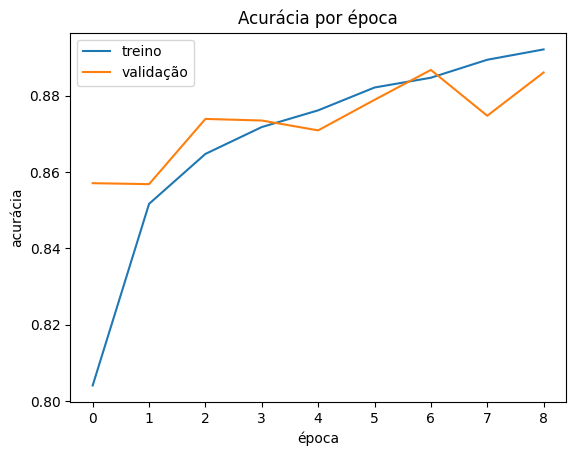

In [30]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época')
plt.ylabel('acurácia')
plt.legend(['treino','validação'])

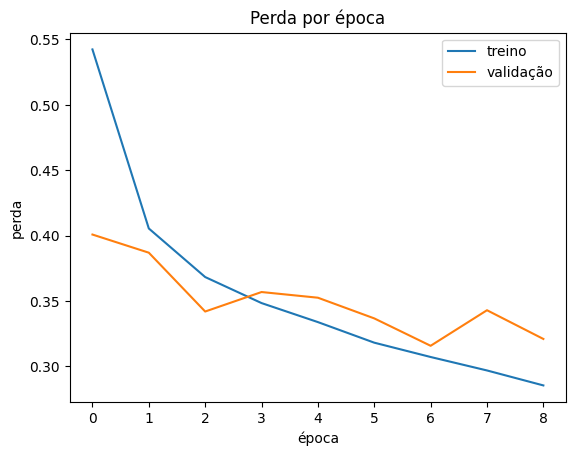

In [31]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('época')
plt.ylabel('perda')
plt.legend(['treino','validação'])

## Testes

In [35]:
#testes de predição
testes= modelo.predict(imagens_teste)
print("resultado teste:",np.argmax(testes[0]))
print("classificação real:",identificacoess_teste[0])

testes_modelo_salvo=modelo_salvo.predict(imagens_teste)
print("resultado teste modelo salvo:",np.argmax(testes_modelo_salvo[0]))
print("classificação real modelo salvo:",identificacoess_teste[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
resultado teste: 9
classificação real: 9
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
resultado teste modelo salvo: 9
classificação real modelo salvo: 9


In [15]:
#função de predição do keras
perda_teste,acuracia_teste= modelo.evaluate(imagens_teste,identificacoess_teste)
print("Perda do teste:",perda_teste)
print("Acurácia do teste:",acuracia_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8506 - loss: 55.8271
Perda do teste: 61.908607482910156
Acurácia do teste: 0.8482000231742859
